# Plotting Notebook
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import os, sys, glob, random
import pickle
import math
import multiprocessing
import itertools
import warnings
import json
import time
import numpy as np
from typing import Dict, List
from rich import print
from rich.pretty import pprint
from rich.console import Console
from rich.table import Table
from rich.progress import Progress, track
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from cycler import cycler
import hist
from hist import Hist
import mplhep as hep
from tabulate import tabulate
import scipy
from scipy.special import binom
import uproot
import ROOT
from iminuit import Minuit
from iminuit.cost import LeastSquares
from jacobi import propagate
%aimport plot_utils
%aimport plot_utils_extras
%aimport fill_utils
%aimport generic_utils

In [4]:
warnings.filterwarnings('ignore')
mpl.rcParams.update({'figure.max_open_warning': 0})
mpl.rcParams['figure.facecolor'] = 'white'
hep.style.use("CMS")
np.set_printoptions(suppress=True)

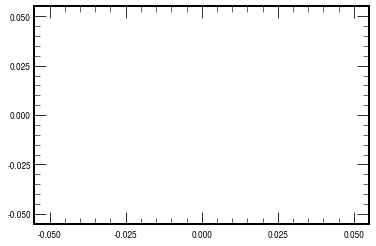

In [5]:
plt.plot()
hep.style.use(hep.style.CMS)
mpl.rcParams['figure.facecolor'] = 'white'

In [6]:
print("The following output directories are available:")
!ls | grep output_histograms

The following output directories are available:

CR_cb_34mu_output_histograms
CR_cb_combine_output_histograms
CR_cb_output_histograms
CR_cb_postDYstudy_output_histograms
CR_light_postDYstudy_output_histograms
CR_prompt_34mu_leading_output_histograms
CR_prompt_34mu_output_histograms
CR_prompt_combine_output_histograms
CR_prompt_dimuon_output_histograms
CR_prompt_dystudy_output_histograms
CR_prompt_leading_output_histograms
CR_prompt_output_histograms
CR_prompt_postDYstudy_output_histograms
DYstudy_2_output_histograms
DYstudy_3_output_histograms
DYstudy_4_output_histograms
DYstudy_5_output_histograms
DYstudy_output_histograms
DYstudy_trigger_match_double_output_histograms
DYstudy_trigger_match_triple_output_histograms
DYstudy_trigger_one_path_output_histograms
fake_rate_output_histograms
kinematics_output_histograms
nbjet_comparison_output_histograms
post_gensum_bug_output_histograms
SR_combine_new_trigger_output_histograms
SR_combine_old_trigger_output_histograms
SR_combine_output_histograms
SR_extrapolation_new_from_mini_output_histo

## Load plots

In [7]:
plots = generic_utils.loader(tag="post_gensum_bug")#, load_data=True, custom_lumi=5301.677943) #custom_lumi=573.120134)

These are all the samples loaded.

In [8]:
keys = list(plots.keys())
pprint(keys)

[
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt_MuEnriched_2018',
│   'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP

In [9]:
for key in plots['QCD_Pt_MuEnriched_2018'].keys():
    pprint(f"{key}")

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_ip3d'

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_miniPFRelIso_all'

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_neutral_iso'

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt'

## Plot stack of bkgs for nMuon distribution

Other_2018: 0.0000 ± 0.0000

VV_2018: 0.0142 ± 0.0032

DY_2018: 0.0000 ± 0.0000

TT_powheg_2018: 0.0000 ± 0.0000

QCD_Pt_MuEnriched_2018: 0.0000 ± 0.0000

Total: 0.0142 ± 0.0032

GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018: 103335.7639 ± 2347.4155

GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018: 4510.6168 ± 445.2476

GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018: 41673.6153 ± 1273.3168

GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018: 1190.2891 ± 229.4537

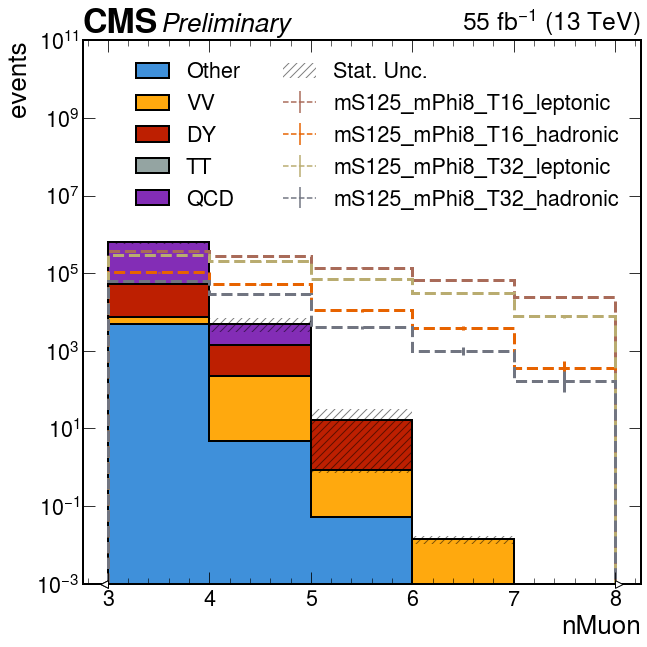

In [19]:
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]

hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'
slc = (1, 1, 1, 1, slice(None))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)
    print(f"{process}: {h_mc[6j::sum].value:.4f} ± {np.sqrt(h_mc[6j::sum].variance):.4f}")
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()
print(f"Total: {hist_bkg_total[6j::sum].value:.4f} ± {np.sqrt(hist_bkg_total[6j::sum].variance):.4f}")
        
hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    print(f"{process}: {h_signal[6j::sum].value:.4f} ± {np.sqrt(h_signal[6j::sum].variance):.4f}")
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(10,10))

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)

# h_data = plots[data][hist_name][slc]
# hep.histplot(
#     h_data,
#     label=["Data"],
#     histtype="errorbar",
#     mec="black",
#     mfc="black",
#     ecolor="black",
#     ax=ax
# )
    
#hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
plt.ylim(1e-3, 1e11)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("nMuon")
plt.ylabel("events")
plt.show()

In [18]:
print(0.1484 + 0.1375)
print(np.sqrt(0.2394**2 + 0.0366**2))

0.28590000000000004

0.24218158476647228

## Plot overlay of bkgs for nMuon distribution

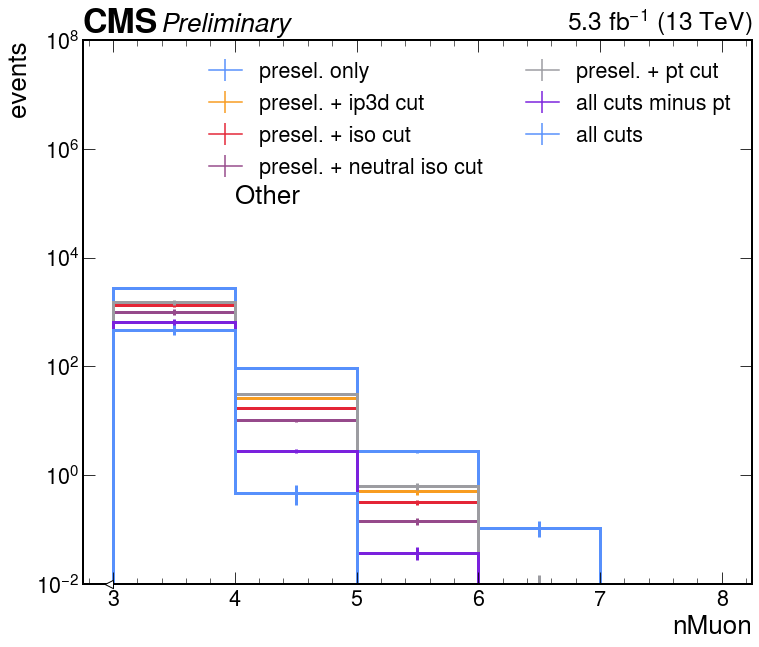

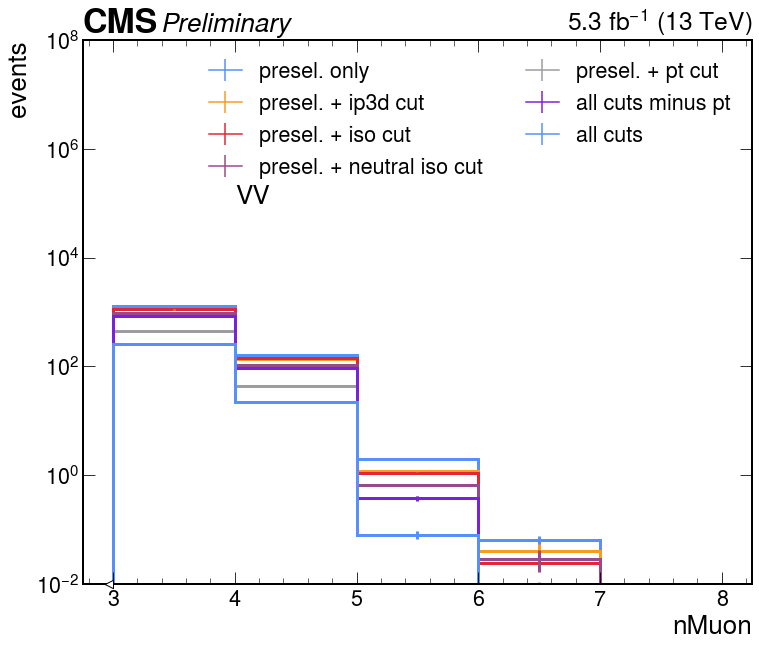

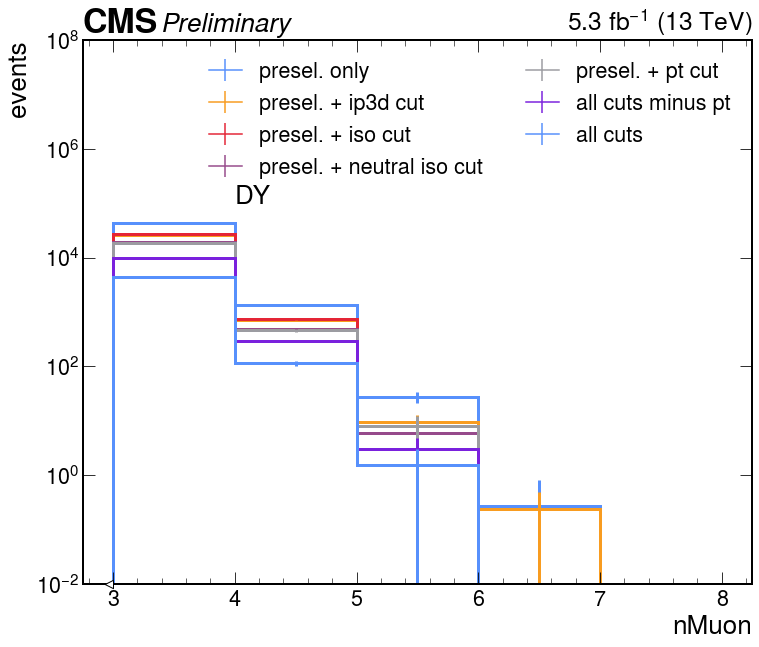

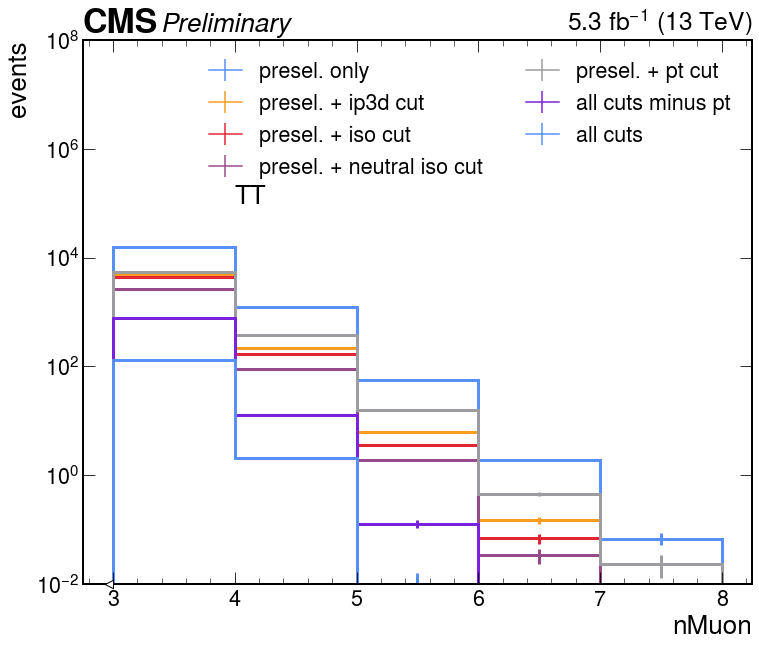

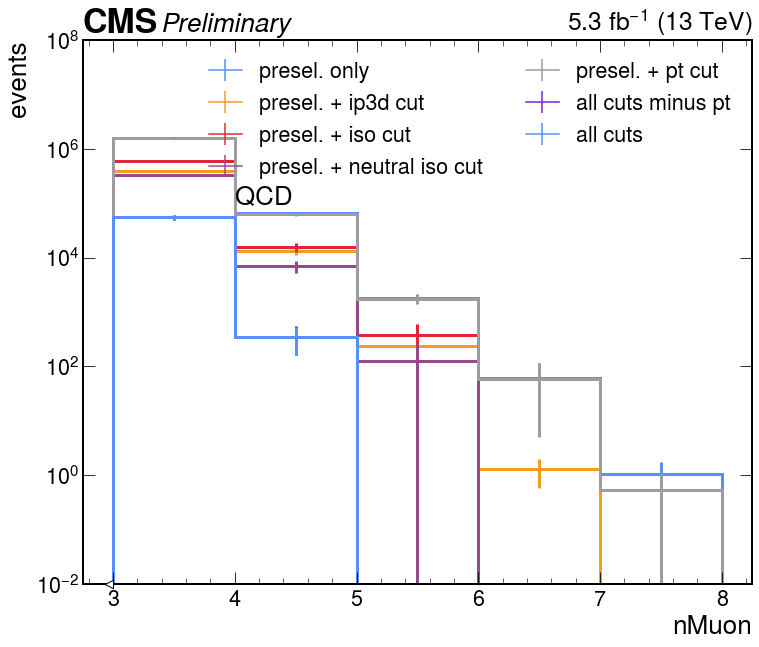

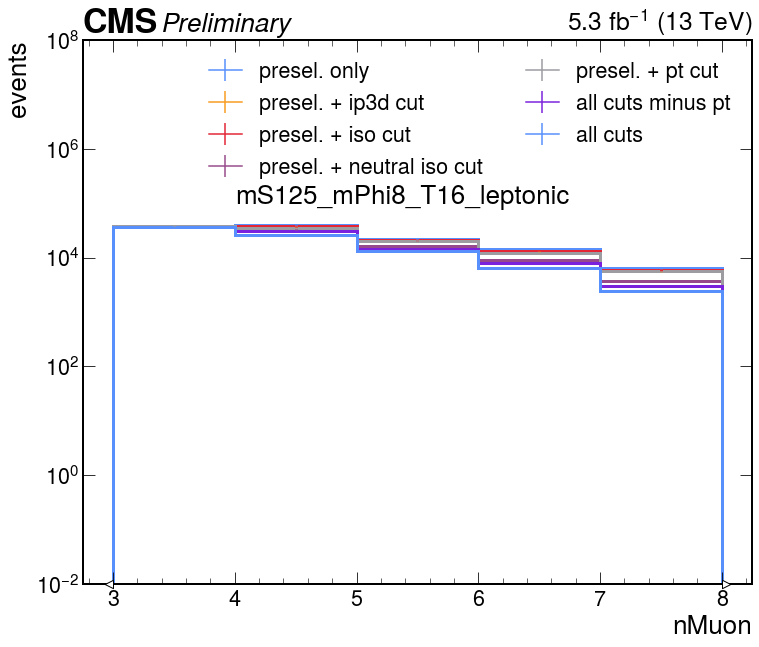

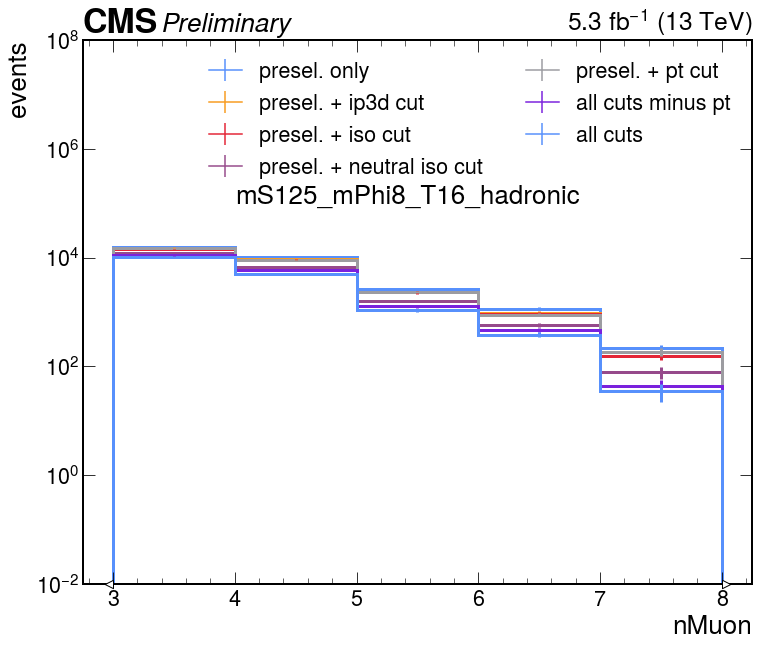

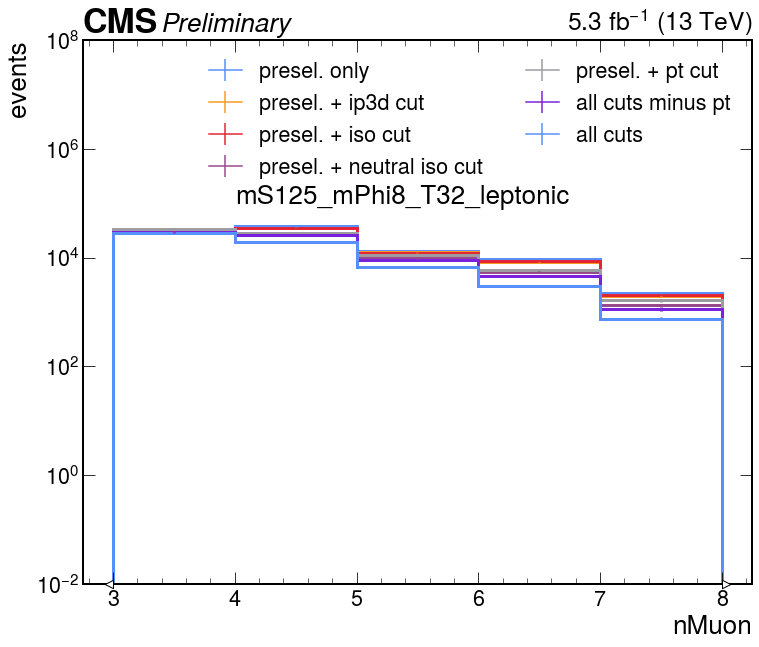

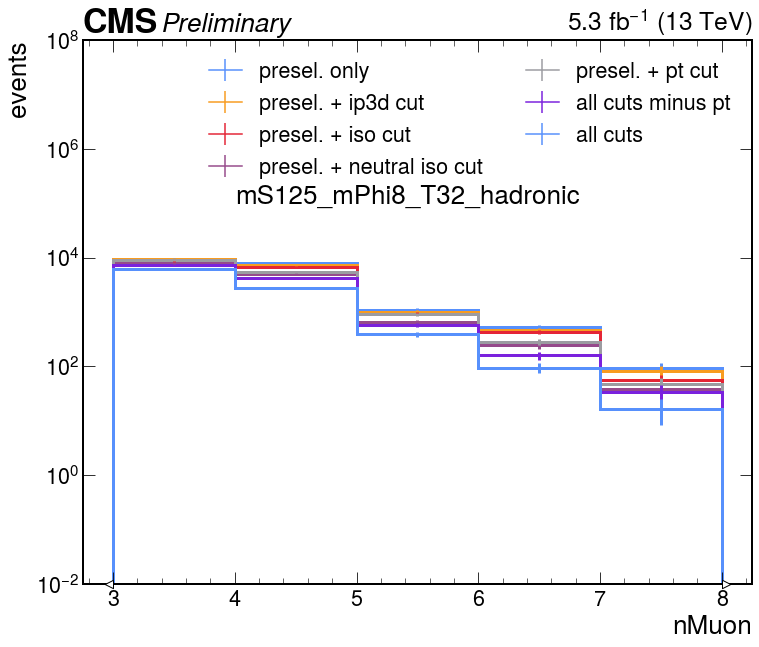

In [106]:
processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
proc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD',
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]

for process, proc_label in zip(processes, proc_labels):
    slices = [
        (0, 0, 0, 0, slice(None)),
        (1, 0, 0, 0, slice(None)),
        (0, 1, 0, 0, slice(None)),
        (0, 0, 1, 0, slice(None)),
        (0, 0, 0, 1, slice(None)),
        (1, 1, 1, 0, slice(None)),
        (1, 1, 1, 1, slice(None)),
    ]
    labels = [
        'presel. only',
        'presel. + ip3d cut',
        'presel. + iso cut',
        'presel. + neutral iso cut',
        'presel. + pt cut',
        'all cuts minus pt',
        'all cuts',
    ]

    hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'

    hists_mc = []
    for slc, label in zip(slices, labels):
        h_mc = plots[process][hist_name][slc]
        hists_mc.append(h_mc)
#         print(label)
#         print(h_mc.values())
#         print(np.sqrt(h_mc.variances()))


    fig, ax = plt.subplots(figsize=(12,10))

    hep.histplot(
        hists_mc,
        yerr=[np.sqrt(h.variances()) for h in hists_mc],
        label=labels,        
        lw=3,
        ax=ax,
    )

    hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
    plt.text(4, 1e5, proc_label)
    plt.ylim(1e-2, 1e8)
    plt.yscale('log')
    plt.legend(ncol=2)
    plt.xlabel("nMuon")
    plt.ylabel("events")
    plt.show()

In [ ]:
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
mc_process = 'DY_2018'
mc_labels = [
    'DY',
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]

hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_nMuon'
slc = (0, 0, 0, slice(None))

hists_mc = []

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)
    print(process, h_mc.values())

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc,
    yerr=[np.sqrt(h.variances()) for h in hists_mc],
    label=mc_labels,        
    lw=3,
    ax=ax,
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e-2, 1e6)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("nMuon")
plt.ylabel("events")
plt.show()

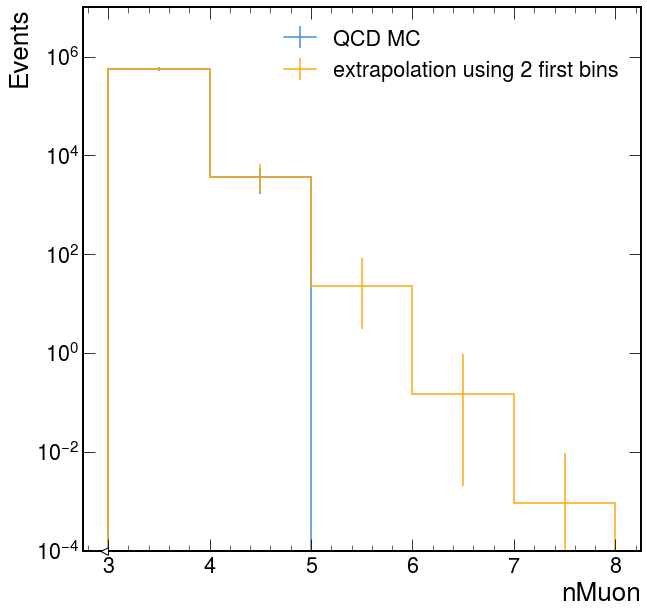

0.1479 ± 0.2406

[ 1.  1. inf inf inf]

[0.14352361 0.76603026        nan        nan        nan]

In [60]:
def pred(h_in, offset=0):
    # Use bins offset, offset+1 to guess the function. Defaults to 0, 1.
    f0 = h_in.values()[offset]
    f1 = h_in.values()[1+offset]
    var_f0 = h_in.variances()[offset]
    var_f1 = h_in.variances()[1+offset]
    values = [f1 * (f1 / f0)**(n - 1) for n in range(len(h_in.values()))]
    variances = [
        (
            ((n - 1) * (f1 / f0)**n)**2 * var_f0 + (n * (f1 / f0)**(n - 1))**2 * var_f1
        ) for n in range(len(h_in.values()))
    ]
    h_out = h_in.copy().reset()
    for i in range(len(h_in.values())):
        h_out[i] = (values[i], variances[i])
    return h_out

h = plots['QCD_Pt_MuEnriched_2018'][
    'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'
][1, 1, 1, 1, :]

h.plot(yerr=np.sqrt(h.variances()), label='QCD MC')
pred(h).plot(label='extrapolation using 2 first bins')
plt.ylabel('Events')
plt.yscale('log')
plt.ylim(1e-4, 1e7)
plt.legend()
plt.show()

print(f"{pred(h)[6j::sum].value:.4f} ± {np.sqrt(pred(h)[6j::sum].variance):.4f}")

print(pred(h).values() / h.values())
print(np.sqrt(pred(h).variances() / (h.values()**2) + pred(h).values()**2 * h.variances() / (h.values()**4)))

WeightedSum(value=45253, variance=791947)

WeightedSum(value=1165.19, variance=11202.7)

WeightedSum(value=15.6362, variance=252.884)

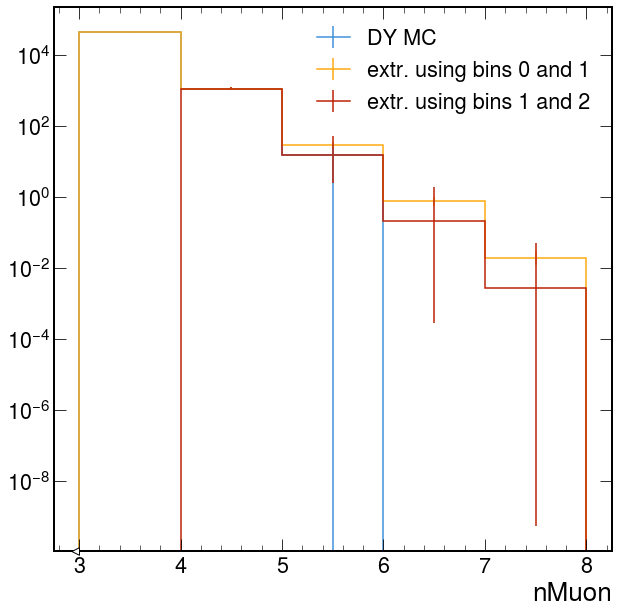

0.7924 ± 0.2128

0.2126 ± 0.4273

In [39]:
h = plots['DY_2018']['ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'][1, 1, 1, 1, :]

print(h[0])
print(h[1])
print(h[2])

h.plot(yerr=np.sqrt(h.variances()), label='DY MC')
pred(h).plot(label='extr. using bins 0 and 1')
pred(h[1:]).plot(label='extr. using bins 1 and 2')
plt.yscale('log')
plt.legend()
plt.show()

print(f"{pred(h)[6j::sum].value:.4f} ± {np.sqrt(pred(h)[6j::sum].variance):.4f}")
print(f"{pred(h[1:])[6j::sum].value:.4f} ± {np.sqrt(pred(h[1:])[6j::sum].variance):.4f}")

In [20]:
print(0.0009 + 0.0199 + 0.014)
print(np.sqrt(0.0021**2 + 0.0073**2 + 0.0032**2))

0.034800000000000005

0.00824257241399795

In [40]:
print(0.0142 + 0.7924 + 0.1479)


print(np.sqrt(0.0032**2 + 0.2128**2 + 0.2406**2))

0.9545

0.32122023597525734

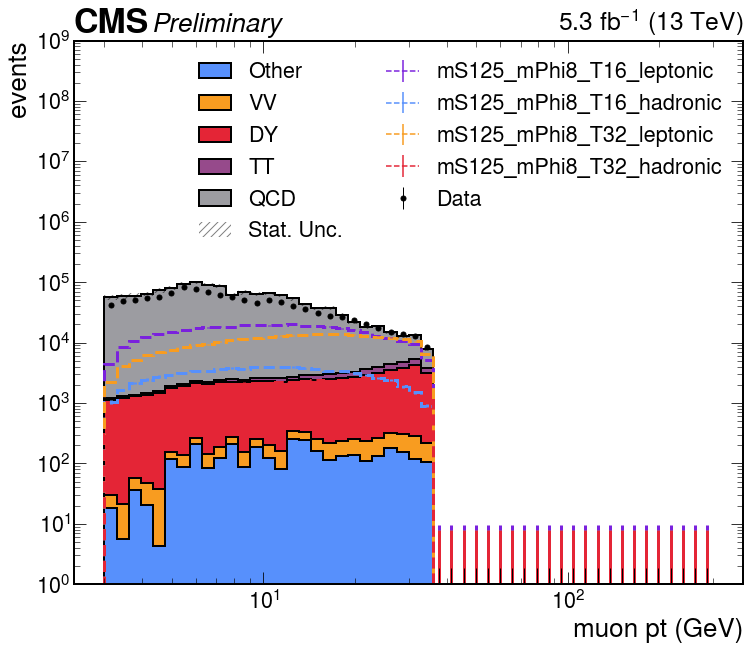

In [16]:
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt'
slc = (1, 1, 1, 1, slice(None, None, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()

h_data = plots[data][hist_name][slc]

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)

hep.histplot(
    h_data,
    label=["Data"],
    histtype="errorbar",
    mec="black",
    mfc="black",
    ecolor="black",
    ax=ax
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e0, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon pt (GeV)")
plt.ylabel("events")
plt.show()

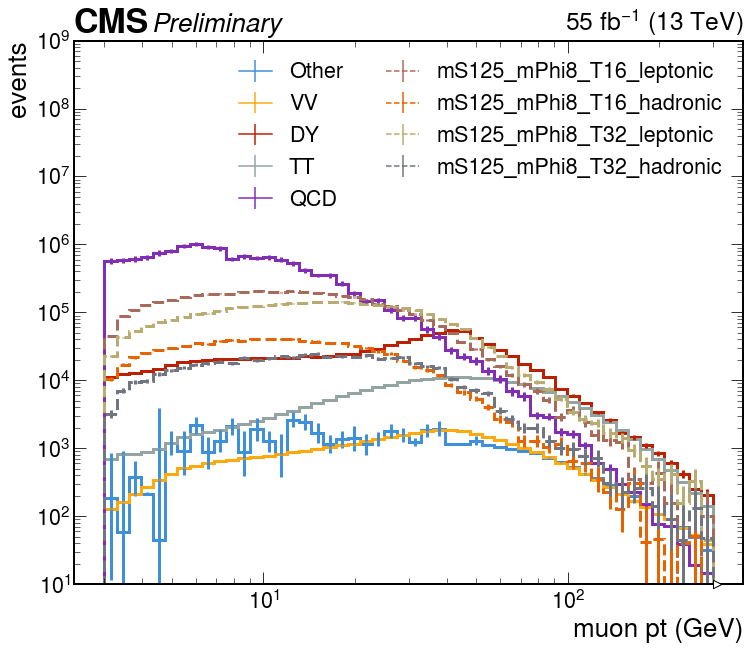

In [21]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt'
slc = (1, 1, 1, 0, slice(None, None, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
#hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
plt.ylim(1e1, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon pt (GeV)")
plt.ylabel("events")
plt.show()

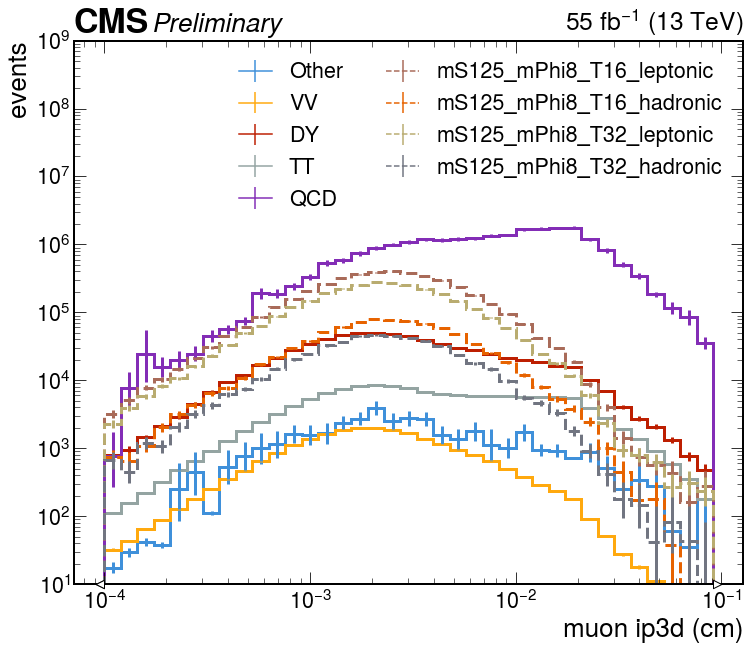

In [32]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_ip3d'
slc = (0, 1, 1, 1, slice(None, 1e-1j, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)

hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
# hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e1, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon ip3d (cm)")
plt.ylabel("events")
plt.show()

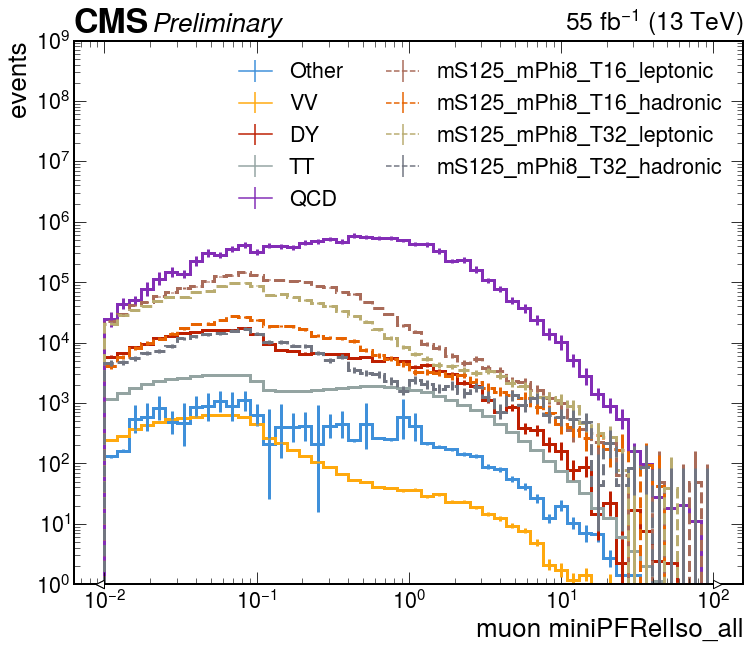

In [30]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_miniPFRelIso_all'
slc = (1, 0, 1, 1, slice(None, None, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
#hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
plt.ylim(1e0, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon miniPFRelIso_all")
plt.ylabel("events")
plt.show()

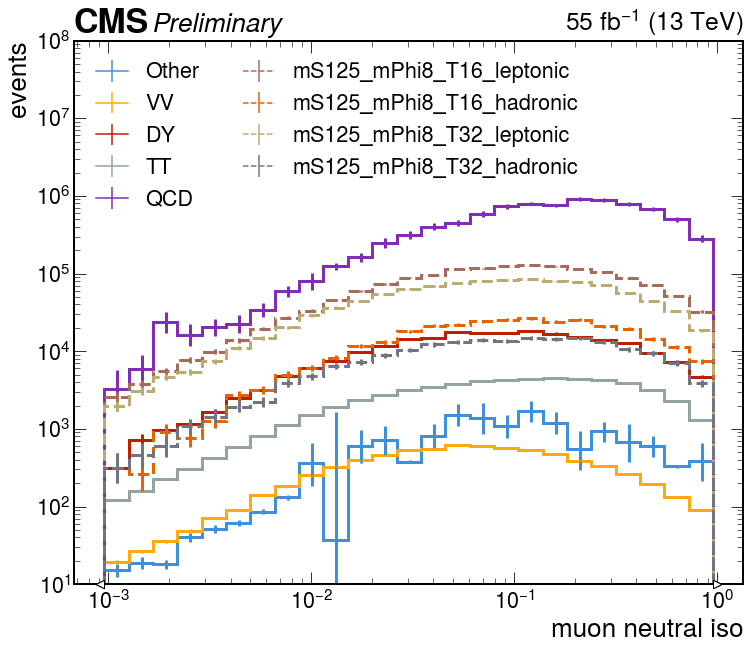

In [29]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_neutral_iso'
slc = (1, 1, 0, 1, slice(1e-3j, 1j, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
#hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
plt.ylim(1e1, 1e8)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon neutral iso")
plt.ylabel("events")
plt.show()

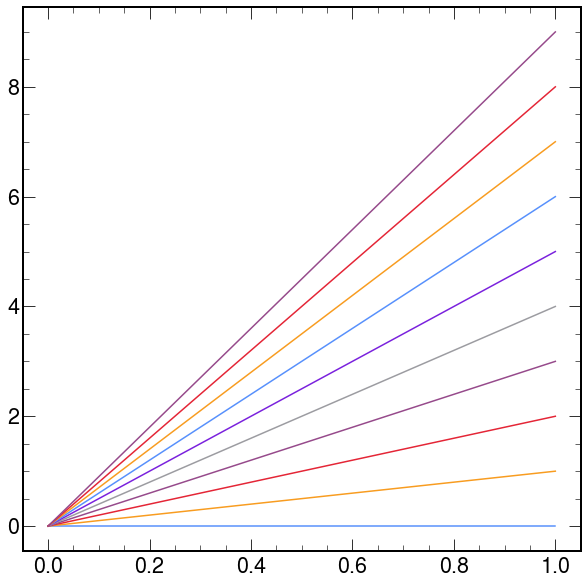

In [23]:
for i in range(10):
    plt.plot([0,1], [0,i])
plt.show()

In [12]:
from cycler import cycler

cmap_petroff_6 = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
cmap_petroff_10 = [
    "#3f90da",
    "#ffa90e",
    "#bd1f01",
    "#94a4a2",
    "#832db6",
    "#a96b59",
    "#e76300",
    "#b9ac70",
    "#717581",
    "#92dadd",
]

CMS = {
    "axes.prop_cycle": cycler("color", cmap_petroff_10)
}
plt.style.use(CMS)

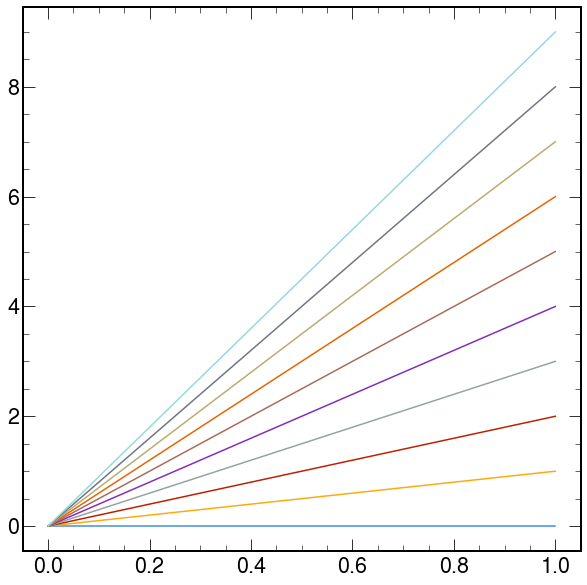

In [25]:
for i in range(10):
    plt.plot([0,1], [0,i])
plt.show()

In [33]:
import ROOT

In [41]:
ROOT.RooStats.AsimovSignificance(1e5, 1, 1)

372.29985605662216

In [42]:
ROOT.RooStats.AsimovSignificance(1e5, 0.1, 0.1)

692.4988800685229

In [61]:
ROOT.RooStats.AsimovSignificance(1, 0.1, )

1.8097982208402172

In [130]:
print(
    [ROOT.RooStats.AsimovSignificance(1e0, i, 0.45 * i) 
    / ROOT.RooStats.AsimovSignificance(1e1, i, 0.45 * i) for i in [1e-4, 1e-3, 1e-2, 1e-1, 1]]
)

[0.2869140563317708, 0.27751377679296346, 0.2603140306067026, 0.22626200883310232, 0.16970594411087875]

In [115]:
1/6.661e-3

150.12760846719712

In [120]:
0.0076*1.3 / 0.0222

0.445045045045045

## Try Chris' method

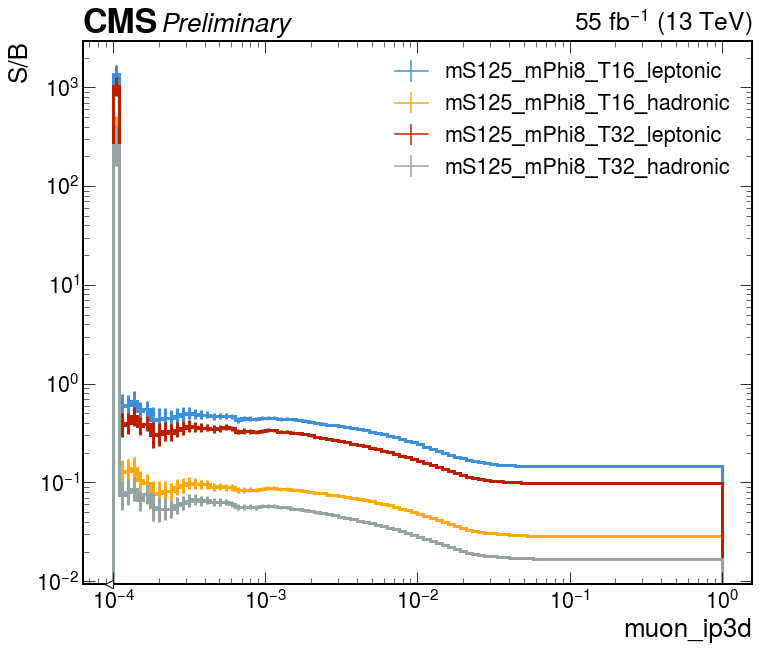

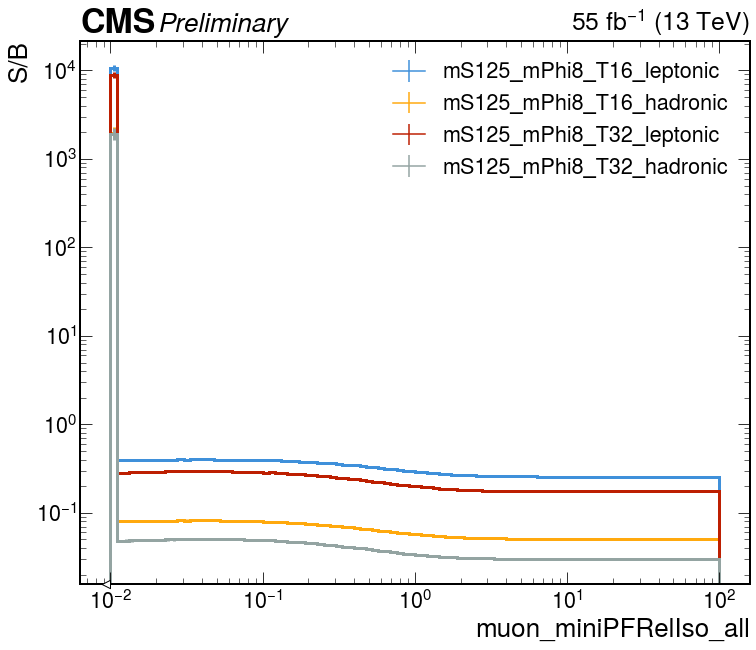

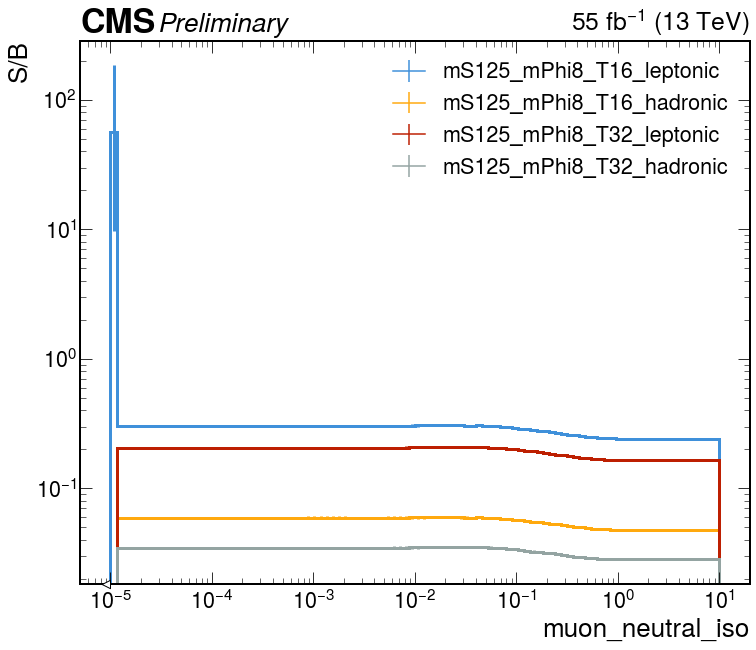

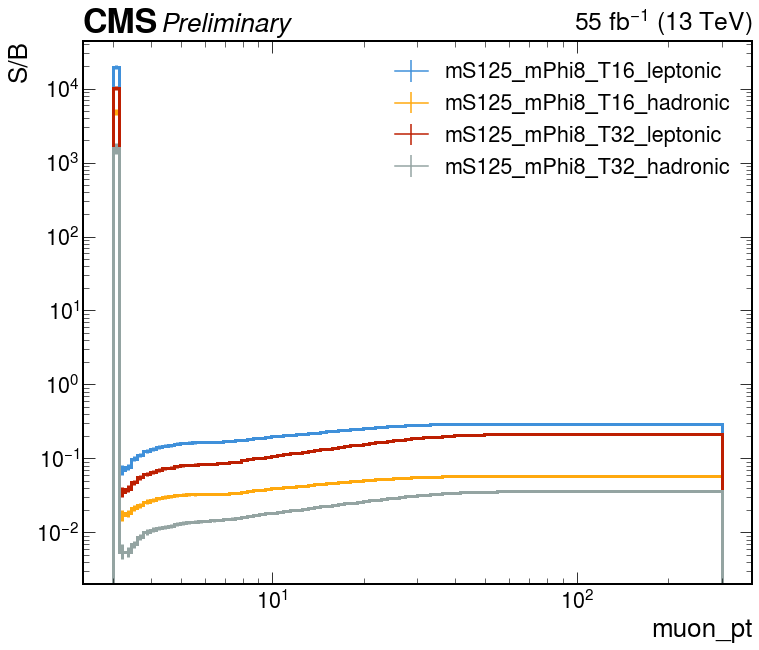

In [63]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_names = [
    ('ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_ip3d', (0, 1, 0, 1, slice(None))),
    ('ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_miniPFRelIso_all', (1, 0, 1, 1, slice(None))),
    ('ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_neutral_iso', (1, 1, 0, 1, slice(None))),
    ('ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt', (1, 1, 1, 0, slice(None)))
]

for hist_name, slc in hist_names:
    hist_bkg_total = None

    for process in mc_processes:
        h_mc = plots[process][hist_name][slc]
        # Here I could feed h_mc to the prediction function
#         if 
#         if "QCD" in process:
#             h_mc = pred(h_mc, offset=0)
#         elif "DY" in process:
#             h_mc = pred(h_mc, offset=1)
        if hist_bkg_total is None:
            hist_bkg_total = h_mc.copy()
        else:
            hist_bkg_total += h_mc.copy()

    hists_s_over_b = []
    for process in signal_processes:
        h_s = plots[process][hist_name][slc]
        h_s_over_b = h_s.copy()
        for i in range(1, len(h_s_over_b.values())):
            tot_bkg = hist_bkg_total[:i:sum].value
            if tot_bkg == 0:
                tot_bkg = 1e-8

            h_s_over_b[i] = (
                h_s[:i:sum].value / tot_bkg,
                h_s[:i:sum].variance / tot_bkg**2
                + h_s[:i:sum].value**2 * hist_bkg_total[:i:sum].variance / tot_bkg**4
            )
        hists_s_over_b.append(h_s_over_b)

    fig, ax = plt.subplots(figsize=(12,10))

    hep.histplot(
        hists_s_over_b, 
        label=signal_labels,        
        lw=3,
        ax=ax,
    )

    hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
    #plt.ylim(1e-2, 2e0)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    #plt.xlabel("muon neutral iso")
    plt.ylabel("S/B")
    plt.show()